In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [136]:
# Reading data from the file

df = pd.read_csv('/adult.data.csv')

In [179]:
#basic info

print(df.describe())
print(df.info())
print(df.shape)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries

In [ ]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels

race_count = (df['race']).value_counts()
print (race_count)

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


In [144]:
# What is the average age of men?

average_age_men = df[df['sex'] == 'Male']['age'].mean()
print (average_age_men)

39.43354749885268


In [ ]:
# What is the percentage of people who have a Bachelor's degree?

percentage_bachelors = len(df[df['education']=='Bachelors']) * 100 / len(df['education'])
print(percentage_bachelors)

16.446055096587944


In [146]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

print((len(df[(df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])) & (df['salary'] == '>50K')]) * 100) / (len(df[(df['education'].isin(['Bachelors', 'Masters', 'Doctorate']))])))

46.535843011613935

In [150]:
# What percentage of people without advanced education make more than 50K?

people_without_advanced_50k = len(df[(~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])) & (df['salary'] == '>50K')])
people_without_advanced = (len(df[(~df['education'].isin(['Bachelors', 'Masters', 'Doctorate']))]))
percentage = (people_without_advanced_50k / people_without_advanced) * 100
print (percentage)

17.3713601914639


In [183]:
# Minimum and maximum work hours per week

print(f"Minimum hours per week: {df['hours-per-week'].min()}")
print(f"Maximum hours per week: {df['hours-per-week'].max()}")

Minimum hours per week: 1
Maximum hours per week: 99


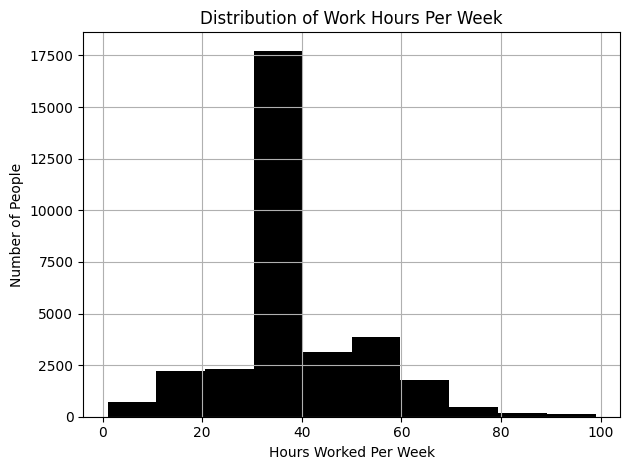

In [181]:
#plot

plot = df['hours-per-week'].hist(color = 'black')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Number of People')
plt.title('Distribution of Work Hours Per Week')
plt.tight_layout()
plt.show()

In [182]:
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?

print(len(df[(df['hours-per-week'] == df['hours-per-week'].min()) & (df['salary'] == '>50K')]) * 100 / len(df[(df['hours-per-week'] == df['hours-per-week'].min())]))

10.0


In [177]:
# What country has the highest percentage of people that earn >50K?

country_percentages = (df[df['salary'] == '>50K']['native-country'].value_counts() / df['native-country'].value_counts()) * 100

highest_earning_country_percentage = round(country_percentages.max(), 1)
highest_earning_country = country_percentages.idxmax()
print (highest_earning_country)

Iran


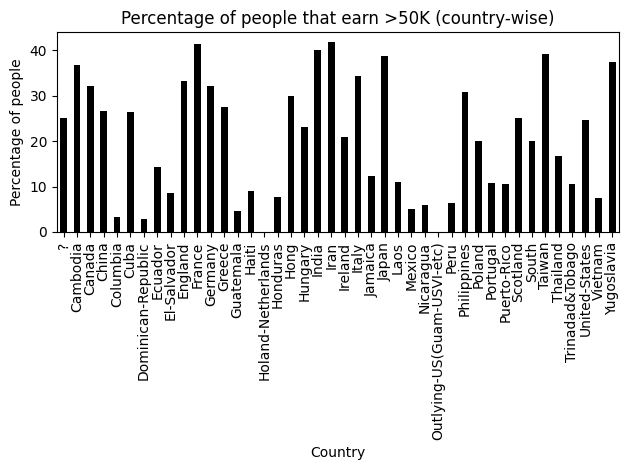

In [184]:
#plot

country_percentages.plot(kind='bar', color = 'black')
plt.xlabel('Country')
plt.ylabel('Percentage of people')
plt.title('Percentage of people that earn >50K (country-wise)')
plt.tight_layout()
plt.show()

In [178]:
# Identify the most popular occupation for those who earn >50K in India

rich_indians = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]
top_occupation = rich_indians['occupation'].value_counts().idxmax()
print(top_occupation)

Prof-specialty
